# Revolut: Analyse & Linear Regression Model

In [79]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [80]:
# loading data
file_path = 'C:/Users/Desktop/Desktop/VisualStudioCode/Revolut/Data/revolut_spending.xlsx'

df_spending_by_sector = pd.read_excel(file_path, sheet_name='Spending by sector', skiprows=5)
df_spending_by_age = pd.read_excel(file_path, sheet_name='Spending by age', skiprows=5)
df_instore_v_online = pd.read_excel(file_path, sheet_name='Instore v online', skiprows=5)
df_monthly_spending_by_sector = pd.read_excel(file_path, sheet_name='Monthly spending by sector', skiprows=4)

#### Checking the first lines of the database

In [81]:
df_spending_by_sector.head()

,Date,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants and fast food",Retail,Travel and accommodation
0,2020-01-01,113.9,125.01,113.52,101.79,119.09,119.98,106.45
1,2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92
2,2020-01-03,117.63,132.2,115.7,107.47,122,121.45,112.93
3,2020-01-04,116.27,135.19,108.49,107.9,119.54,119.46,113.16
4,2020-01-05,113.75,135.02,99.38,107.01,113.3,118.46,112.29


In [82]:
df_spending_by_age.head()

,Date,Total,18-34,35-54,55+
0,2020-01-01,113.9,105.14,126.32,103.74
1,2020-01-02,117.51,108.08,130.03,109.24
2,2020-01-03,117.63,108.42,129.62,110.33
3,2020-01-04,116.27,108,126.97,109.88
4,2020-01-05,113.75,106.9,122.95,107.43


In [83]:
df_instore_v_online.head()

,Date,Online
0,2020-01-01,22
1,2020-01-02,22
2,2020-01-03,22
3,2020-01-04,23
4,2020-01-05,24


In [84]:
df_monthly_spending_by_sector.head()

,Month,Total,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants and fast food",Retail,Travel and accommodation
0,2020-01-01,97.16677,103.89,87.168390,93.94,90.14,105.08970,96.31484
1,2020-02-01,99.40897,99.19,100.104800,98.34,97.83,100.31590,100.28100
2,2020-03-01,75.47710,85.23,48.308390,111.16,60.48,85.07419,57.81000
3,2020-04-01,39.53067,43.00,6.634333,98.10,8.46,61.58867,6.99000
4,2020-05-01,48.48290,59.88,8.907097,102.20,13.48,79.36806,10.82387


#### Data cleaning and removing empty fields

In [85]:
df_spending_by_sector.replace('[x]', np.nan, inplace=True)
df_spending_by_sector.dropna(inplace=True)

df_spending_by_age.replace('[x]', np.nan, inplace=True)
df_spending_by_age.dropna(inplace=True)


#### Convert the 'Date' column to date format

In [86]:
df_spending_by_sector['Date'] = pd.to_datetime(df_spending_by_sector['Date'])
df_spending_by_age['Date'] = pd.to_datetime(df_spending_by_age['Date'])
df_instore_v_online['Date'] = pd.to_datetime(df_instore_v_online['Date'])
df_monthly_spending_by_sector['Month'] = pd.to_datetime(df_monthly_spending_by_sector['Month'])


### PART 1 - Spending by sector

#### Daily average spend

In [87]:
# Convert selected data columns to NumPy array
df_array_spending_by_sector = df_spending_by_sector[['Date', 'Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation']].to_numpy()

# Data grouping by days
grouped_data = df_spending_by_sector.groupby([df_spending_by_sector['Date'].dt.year, df_spending_by_sector['Date'].dt.month, df_spending_by_sector['Date'].dt.day])

dates = df_array_spending_by_sector[:, 0]

unique_dates = np.unique(dates)

results = {}

# Calculating average daily spend for each unique date
for unique_date in unique_dates:
    mask = dates == unique_date
    daily_totals = np.sum(df_array_spending_by_sector[mask, 1:].astype(float), axis=0)
    daily_avg = round(np.mean(daily_totals), 2)
    results[unique_date] = daily_avg

# Converting the results dictionary to a DataFrame for better visualization    
results_daily = pd.DataFrame(list(results.items()), columns=['Date', 'Average'])
results_daily.head()


,Date,Average
0,2020-01-01,114.31
1,2020-01-02,118.07
2,2020-01-03,118.62
3,2020-01-04,117.29
4,2020-01-05,114.24


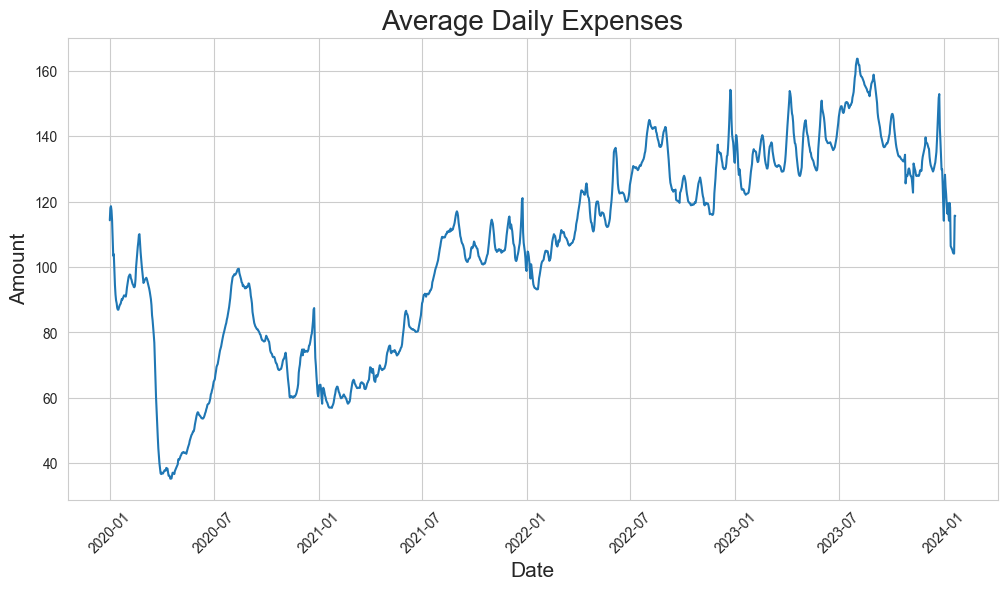

In [88]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x=list(results.keys()), y=list(results.values()))

plt.title('Average Daily Expenses', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.xticks(rotation = 45)
plt.ylabel('Amount', fontsize = 15)

plt.show()


#### Monthly average spend

In [89]:
# Creating an additional column
df_spending_by_sector['YearMonth'] = df_spending_by_sector['Date'].dt.to_period('M')
unique_months = df_spending_by_sector['YearMonth'].unique()
results_monthly = {}

# Convert selected data columns to NumPy array
df_array_spending_by_sector = df_spending_by_sector[['Date', 'Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation']].to_numpy()

# Calculating average monthly spend for each unique date
for unique_month in unique_months:
    mask = df_spending_by_sector['YearMonth'] == unique_month
    monthly_sum = np.sum(df_array_spending_by_sector[mask, 1:].astype(float), axis=0)
    monthly_avg = round(np.mean(monthly_sum), 2)
    results_monthly[unique_month] = monthly_avg

# Converting the results dictionary to a DataFrame for better visualization    
results_monthly = pd.DataFrame(list(results_monthly.items()), columns=['Date', 'Average'])
results_monthly['Date'] = results_monthly['Date'].apply(lambda x: pd.Timestamp(x.start_time))
results_monthly.head()
    

,Date,Average
0,2020-01-01,2978.80
1,2020-02-01,2880.96
2,2020-03-01,2314.97
3,2020-04-01,1123.83
4,2020-05-01,1419.06


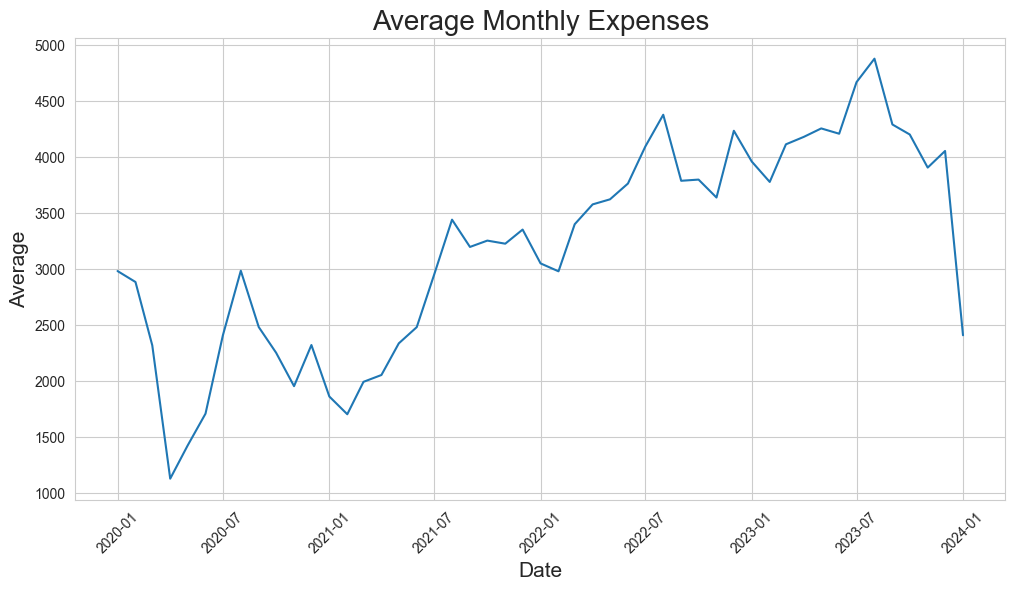

In [90]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Date', y='Average', data=results_monthly)

plt.title('Average Monthly Expenses', fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Average', fontsize = 15)

plt.xticks(rotation = 45)

plt.show()

#### Linear Regression

In [104]:
# converts a date to an integer
results_monthly['Date_ordinal'] = results_monthly['Date'].apply(lambda x: x.toordinal())

# getting the first date value from the data
start_date = results_monthly['Date_ordinal'].min()

# set the first data value
results_monthly['Date_ordinal_adjusted'] = results_monthly['Date_ordinal'] - start_date

# preparation of variables for the model
x = results_monthly['Date_ordinal_adjusted'].values.reshape(-1, 1)
y = results_monthly['Average'].values

# split into test train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=7)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# use the test data to predict values to test the model
y_pred = model.predict(x_test)

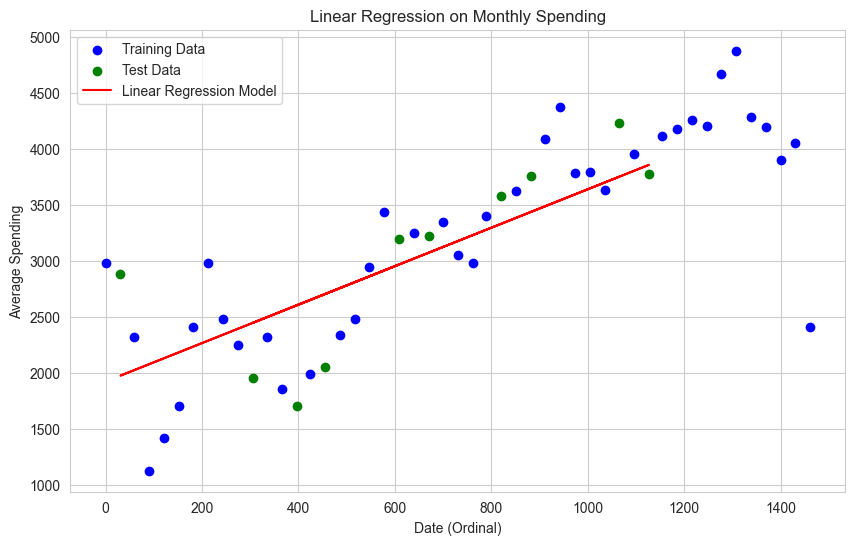

In [105]:
# plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data') 
plt.scatter(x_test, y_test, color='green', label='Test Data')  
plt.plot(x_test, y_pred, color='red', label='Linear Regression Model')  
plt.xlabel('Date (Ordinal)')
plt.ylabel('Average Spending')
plt.title('Linear Regression on Monthly Spending')
plt.legend()
plt.show()

#### Standard deviation of the section for each month

In [ ]:
# Extract YearMonth and the number of days in each month from the 'Date' column
df_spending_by_sector['YearMonth'] = df_spending_by_sector['Date'].dt.to_period('M')
df_spending_by_sector['DaysInMonth'] = df_spending_by_sector['Date'].dt.days_in_month

# Grouping data by months
grouped_data = df_spending_by_sector.groupby('YearMonth')

# Calculate the sum of spending for each category by month
sum_by_month = grouped_data[['Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation']].sum()

# Calculate the average daily spending
average_by_month = sum_by_month.div(grouped_data['DaysInMonth'].first(), axis=0)

# Calculate standard deviation of daily spending
std_by_month = average_by_month.std(axis=1)

result_std = pd.DataFrame({'Date': std_by_month.index.to_timestamp(), 'Standard Deviation': std_by_month.values})

result_std.head()

,Date,Standard Deviation
0,2020-01-01,7.231001
1,2020-02-01,1.070494
2,2020-03-01,23.373601
3,2020-04-01,37.443679
4,2020-05-01,40.336716


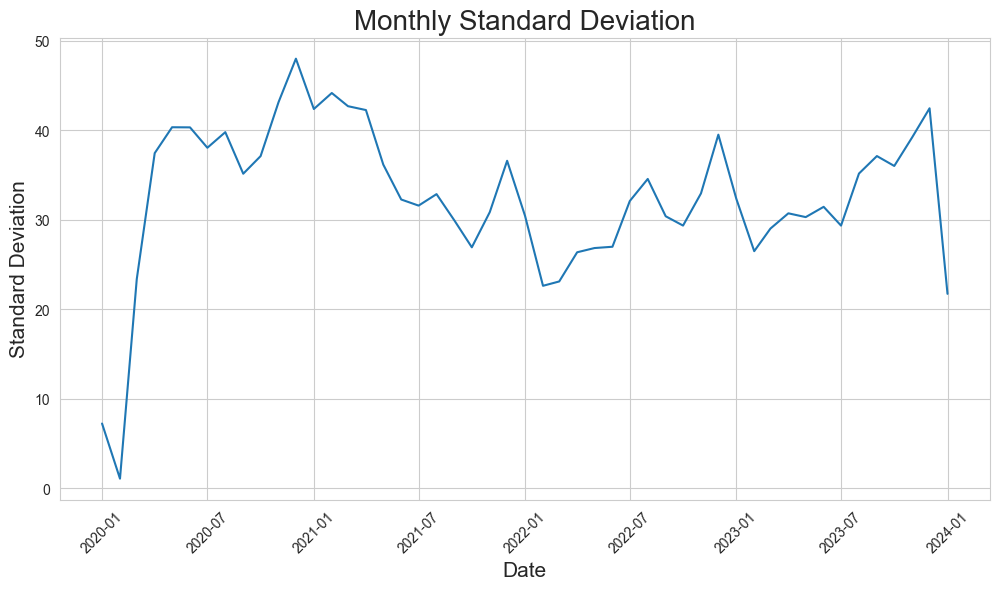

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.lineplot(x='Date', y='Standard Deviation', data=result_std)

plt.title('Monthly Standard Deviation', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Standard Deviation', fontsize=15)
plt.xticks(rotation=45)

plt.show()

#### Daily Expense Comparison

In [ ]:
# Grouping data by days
grouped_data = df_spending_by_sector.groupby(df_spending_by_sector['Date'].dt.date)

# Calculate the sum of spending for each category
daily_totals = grouped_data[[
    'Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation'
]].sum()

daily_totals.head()
    

,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants and fast food",Retail,Travel and accommodation
Date,,,,,,
2020-01-01,125.01,113.52,101.79,119.09,119.98,106.45
2020-01-02,128.54,117.09,107.25,121.97,122.67,110.92
2020-01-03,132.20,115.70,107.47,122.00,121.45,112.93
2020-01-04,135.19,108.49,107.90,119.54,119.46,113.16
2020-01-05,135.02,99.38,107.01,113.30,118.46,112.29


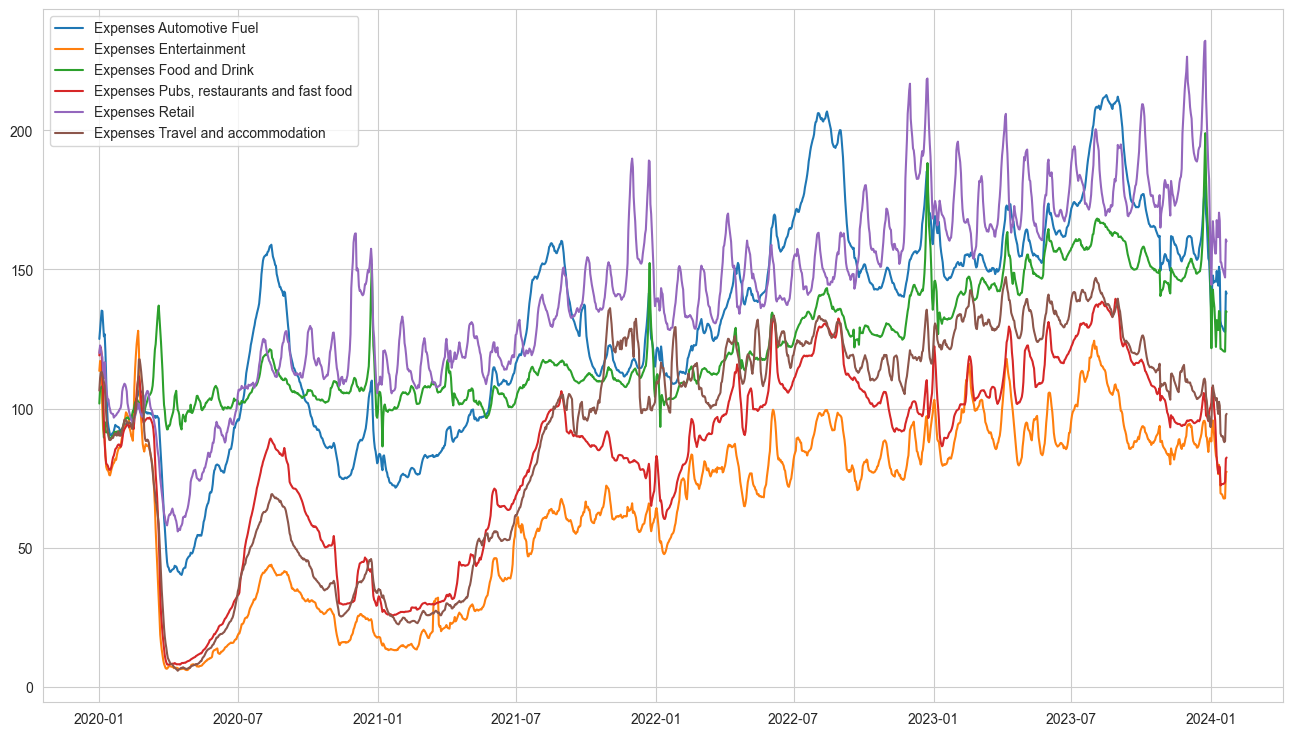

In [ ]:
plt.figure(figsize=(16, 9))

for column in daily_totals.columns:
    plt.plot(daily_totals.index, daily_totals[column], label=f'Expenses {column}')
    
plt.legend()
plt.show()

#### Monthly Expense Comparison

In [ ]:
df_spending_by_sector['YearMonth'] = df_spending_by_sector['Date'].dt.to_period('M')
df_spending_by_sector['DaysInMonth'] = df_spending_by_sector['Date'].dt.days_in_month

grouped_data = df_spending_by_sector.groupby('YearMonth')

categories = [
    'Automotive Fuel', 'Entertainment', 'Food and Drink', 'Pubs, restaurants and fast food', 'Retail', 'Travel and accommodation'
]

average_spending = pd.DataFrame()

for category in categories:
    sum_category = grouped_data[[category]].sum()
    average_category = round(sum_category.div(grouped_data['DaysInMonth'].first(), axis=0), 2)
    average_spending[category] = average_category[category]
    
average_spending.head()


,Automotive Fuel,Entertainment,Food and Drink,"Pubs, restaurants and fast food",Retail,Travel and accommodation
YearMonth,,,,,,
2020-01,103.89,87.17,93.94,90.14,105.09,96.31
2020-02,99.19,100.10,98.34,97.83,100.32,100.28
2020-03,85.23,48.31,111.16,60.48,85.07,57.81
2020-04,43.00,6.63,98.10,8.46,61.59,6.99
2020-05,59.88,8.91,102.20,13.48,79.37,10.82


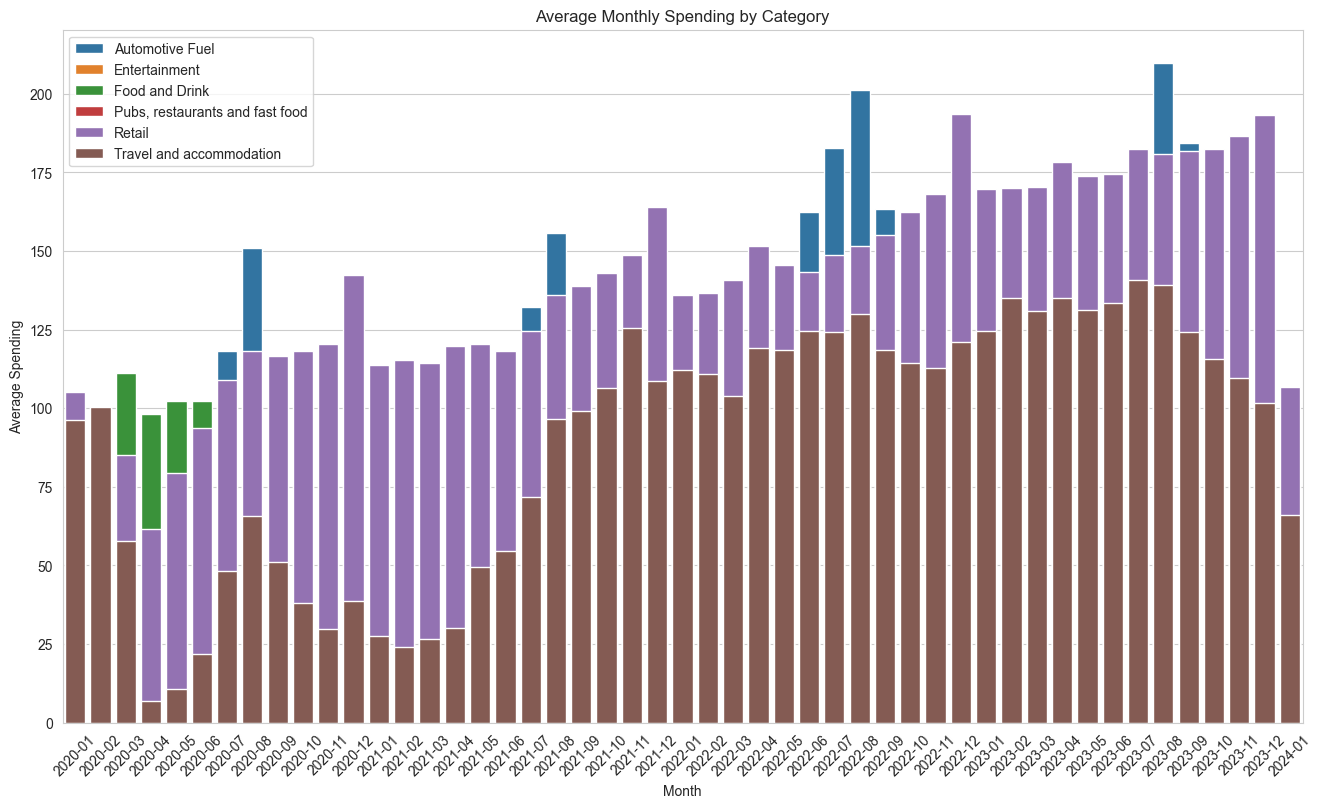

In [ ]:
plt.figure(figsize=(16, 9))
sns.set_style('whitegrid')

for category in categories:
    sns.barplot(x='YearMonth', y=category, data=average_spending, label=category)
    
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Spending')
plt.title('Average Monthly Spending by Category')
plt.xticks(rotation=45)

plt.show()


### PART 2 - Spending by age

In [ ]:
# Extract YearMonth and the number of days in each month from the 'Date' column
df_spending_by_age['YearMonth'] = df_spending_by_age['Date'].dt.to_period('M')
df_spending_by_age['DaysInMonth'] = df_spending_by_age['Date'].dt.days_in_month

grouped_data = df_spending_by_age.groupby('YearMonth')

categories = [
    '18-34', '35-54', '55+'
]

# Create a DataFrame to store the result
average_spending_by_age = pd.DataFrame(index=grouped_data.groups.keys())

for category in categories:
    sum_category = grouped_data[[category]].sum()
    average_category = round(sum_category.div(grouped_data['DaysInMonth'].first(), axis=0), 2)
    average_spending_by_age[category] = average_category[category]
    
average_spending_by_age.head()


,18-34,35-54,55+
2020-01,98.89,96.21,94.43
2020-02,99.16,99.67,99.42
2020-03,81.67,70.54,70.40
2020-04,43.34,39.51,26.74
2020-05,52.41,49.23,32.85


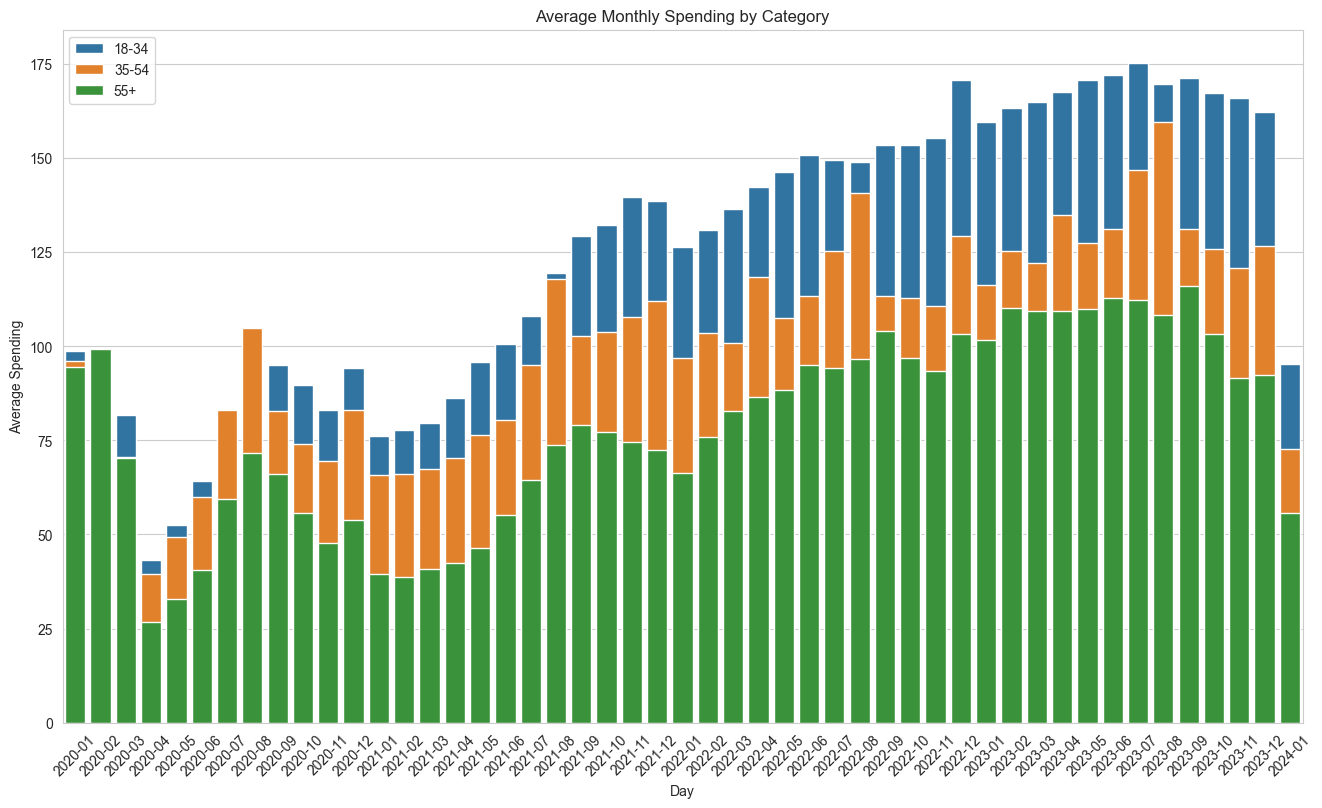

In [ ]:
plt.figure(figsize=(16, 9))
sns.set_style('whitegrid')

for category in categories:
    sns.barplot(x=average_spending_by_age.index, y=average_spending_by_age[category], label=category)
    
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Spending')
plt.title('Average Monthly Spending by Category')
plt.xticks(rotation=45)

plt.show()

### PART 3 - Online shopping

In [ ]:
grouped_data = df_instore_v_online.groupby(df_instore_v_online['Date'].dt.date)

category = ['Online']

for item in category:
    print(item)

Online
